In [1]:
import nltk;
from nltk.corpus import gutenberg
import re
from nltk.corpus import stopwords
import pandas as pd
import statistics 
import math
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from nltk.tokenize import word_tokenize

def dataPreprocessing():
    nltk.corpus.gutenberg.fileids()
    files_en = gutenberg.fileids()      # Get file ids
    doc_en1 = gutenberg.open('edgeworth-parents.txt').read()
    doc_en2 = gutenberg.open('milton-paradise.txt').read()
    doc_en3 = gutenberg.open('whitman-leaves.txt').read()
    tokens_en1 = re.sub('[^A-Za-z]', ' ', doc_en1)
    tokens_en2 = re.sub('[^A-Za-z]', ' ', doc_en2)
    tokens_en3 = re.sub('[^A-Za-z]', ' ', doc_en3)
    #nltk.download('gutenberg')
    tokens_en_lower1 = tokens_en1.lower()
    tokens_en_lower2 = tokens_en2.lower()
    tokens_en_lower3 = tokens_en3.lower()
    tokens_en_lower1 = word_tokenize(tokens_en_lower1)
    tokens_en_lower2 = word_tokenize(tokens_en_lower2)
    tokens_en_lower3 = word_tokenize(tokens_en_lower3)

    filtered_words1 = [word for word in tokens_en_lower1 if word not in stopwords.words('english')]
    filtered_words2 = [word for word in tokens_en_lower2 if word not in stopwords.words('english')]
    filtered_words3 = [word for word in tokens_en_lower3 if word not in stopwords.words('english')]

    #Segmentation
    sampledData1=[]
    sampledData2=[]
    sampledData3=[]
    

    for i in range(0, 200*150,150):
        sampledData1.append(filtered_words1[i:i+150])
    for j in range(0, 200*150,150):
        sampledData2.append(filtered_words2[j:j+150])
    for k in range(0, 200*150,150):
        sampledData3.append(filtered_words3[k:k+150])
    
    sampledData =sampledData1 + sampledData2 + sampledData3
    dataframe = pd.DataFrame(sampledData)
    dataframe= dataframe.apply(" ".join, axis=1)
    dataframe = pd.DataFrame(dataframe)
    dataframe.columns = ['Sample']
    c = pd.DataFrame({'author':[],'Genre':[]})
    frames =[dataframe,c]
    MergedFrame = pd.concat(frames)
    MergedFrame = MergedFrame[['Sample','author','Genre']]

    # Appending label on segments
    for i in range(200):
        MergedFrame['Genre'][i] ="Fiction"
        MergedFrame['author'][i] =0
    for i in range(200,400):
        MergedFrame['Genre'][i] ="Poetry"
        MergedFrame['author'][i] =1
    for i in range(400,600):
        MergedFrame['Genre'][i] ="Tragedy"
        MergedFrame['author'][i] =2
    
    return MergedFrame

#Call dataPreprocessing
MergedFrame= dataPreprocessing()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: Setting

In [81]:
#Transformation of TFiDF
from sklearn.feature_extraction.text import TfidfVectorizer
matrixTfidf = TfidfVectorizer(max_df=0.8, max_features=200000,stop_words='english',
                                 min_df=0.1,
                                 use_idf=True, ngram_range=(1,3))
XTfidf = matrixTfidf.fit_transform(MergedFrame['Sample']).todense()
XTfidf= pd.DataFrame(XTfidf, columns= matrixTfidf.get_feature_names())
XTfidf

#from sklearn.metrics.pairwise import cosine_similarity
#dist = 1 - cosine_similarity(XTfidf)

,air,arms,away,best,better,bring,came,children,come,cried,...,till,time,voice,way,went,woman,words,work,world,young
0,0.000000,0.0,0.000000,0.121864,0.000000,0.000000,0.000000,0.269243,0.096288,0.000000,...,0.000000,0.096546,0.000000,0.000000,0.000000,0.000000,0.000000,0.114849,0.110269,0.130309
1,0.000000,0.0,0.125261,0.000000,0.000000,0.136189,0.103888,0.408566,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.113421,0.118277,0.000000,0.125770,0.116185,0.000000,0.000000
2,0.000000,0.0,0.153379,0.000000,0.000000,0.000000,0.127209,0.000000,0.119275,0.000000,...,0.000000,0.119595,0.000000,0.000000,0.144828,0.000000,0.000000,0.000000,0.000000,0.161417
3,0.000000,0.0,0.000000,0.000000,0.188125,0.000000,0.000000,0.194352,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.168791,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.115831,0.103398,0.134244,0.000000,0.375639,0.000000,0.000000,0.368995,0.000000,0.139555
5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.579716,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.167824,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.169292,0.000000,0.000000,0.427981,0.000000,0.133762,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.797732,0.000000,0.000000
7,0.000000,0.0,0.000000,0.218354,0.466970,0.241213,0.000000,0.241213,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.200409,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166905,0.348102,0.000000,0.000000,0.341945,0.000000,0.000000
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.323468,0.000000,0.000000,0.000000,0.000000,0.000000


In [82]:
len(XTfidf)

600

In [60]:
# Transformation to Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
matrixBoW = CountVectorizer(max_features=10000)
XBoW = matrixBoW.fit_transform(MergedFrame['Sample']).todense()
XBoW= pd.DataFrame(XBoW, columns= matrixBoW.get_feature_names())
XBoW

,aaron,abandon,abandonment,abashed,abbey,abdiel,abhor,abhorred,abide,abilities,...,zealous,zee,zenith,zephon,zephyr,zephyrus,zeus,zinc,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


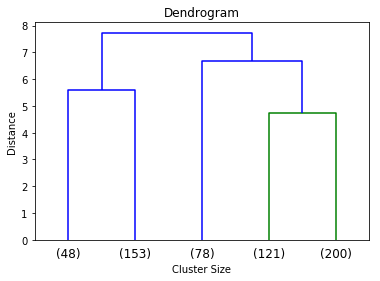

In [4]:
# Hierarchial Clustering For XTfidf
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(XTfidf, method='ward'),truncate_mode='lastp',p=5)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

<Figure size 432x288 with 0 Axes>

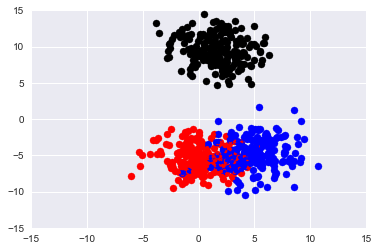

In [58]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
data=XTfidf
data,y = make_blobs(n_samples=600, n_features=105, centers=3, cluster_std=2, random_state=50)
plt.figure(2)
# create dendrogram
#dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
#plt.title('dendrogram')

# create clusters linkage="average", affinity=metric , linkage = 'ward' affinity = 'euclidean'
hc = AgglomerativeClustering(n_clusters=3, linkage="average", affinity='euclidean')

# save clusters for chart
cluster_HC_Tfidf = hc.fit_predict(data,y)

plt.figure(3)

# create scatter plot
plt.scatter(data[y==0,0], data[y==0,1], c='red', s=50)
plt.scatter(data[y==1, 0], data[y==1, 1], c='black', s=50)
plt.scatter(data[y==2, 0], data[y==2, 1], c='blue', s=50)


plt.xlim(-15,15)
plt.ylim(-15,15)


plt.scatter(data[cluster_HC_Tfidf ==0,0], data[cluster_HC_Tfidf == 0,1], s=10, c='red')
plt.scatter(data[cluster_HC_Tfidf==1,0], data[cluster_HC_Tfidf == 1,1], s=10, c='black')
plt.scatter(data[cluster_HC_Tfidf ==2,0], data[cluster_HC_Tfidf == 2,1], s=10, c='blue')


plt.show()

<Figure size 432x288 with 0 Axes>

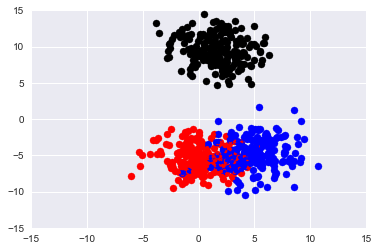

In [63]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
data=XBoW
data,y = make_blobs(n_samples=600, n_features=105, centers=3, cluster_std=2, random_state=50)
plt.figure(2)
# create dendrogram
#dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
#plt.title('dendrogram')

# create clusters linkage="average", affinity=metric , linkage = 'ward' affinity = 'euclidean'
hc = AgglomerativeClustering(n_clusters=3, linkage="average", affinity='euclidean')

# save clusters for chart
cluster_HC_BOW = hc.fit_predict(data,y)

plt.figure(3)

# create scatter plot
plt.scatter(data[y==0,0], data[y==0,1], c='red', s=50)
plt.scatter(data[y==1, 0], data[y==1, 1], c='black', s=50)
plt.scatter(data[y==2, 0], data[y==2, 1], c='blue', s=50)


plt.xlim(-15,15)
plt.ylim(-15,15)


plt.scatter(data[cluster_HC_BOW ==0,0], data[cluster_HC_BOW == 0,1], s=10, c='red')
plt.scatter(data[cluster_HC_BOW==1,0], data[cluster_HC_BOW == 1,1], s=10, c='black')
plt.scatter(data[cluster_HC_BOW ==2,0], data[cluster_HC_BOW == 2,1], s=10, c='blue')


plt.show()

In [69]:
#KMeans Clustering for Tfidf and BoW
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X, y = make_blobs(n_samples=600,
                  n_features=105,
                  centers=3,
                  center_box=(-10.0, 10.0),
                  #shuffle=True,
                 # random_state=1
                 )  # For reproducibility

range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,random_state= 1)
    cluster_labels_KMeans = clusterer.fit_predict(XTfidf)
    cluster_labels_KMeans_BOW =clusterer.fit_predict(XBoW)
    

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

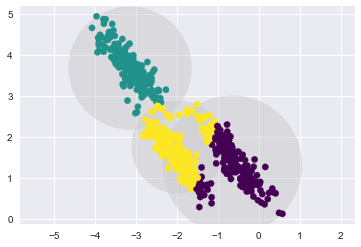

In [17]:
# Clustering Visualization  in stretch form for KMeans
rng = np.random.RandomState(13)
X_stretched = np.dot(XTfidf, rng.randn(2, 2))

kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X_stretched)

In [73]:
# Clustering using EM algorithm
from sklearn.mixture import GMM
gmm = GMM(n_components=3,random_state = 1).fit(XTfidf)
cluster_labels_EM = gmm.predict(XTfidf)
cluster_labels_EM
#plt.scatter(XTfidf[:, 0], XTfidf[:, 1], c=labels, s=40, cmap='viridis');

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,

In [74]:
probs = gmm.predict_proba(XTfidf)
print(probs[:5].round(3))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [111]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, XTfidf, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(XTfidf).predict(XTfidf)
    if label:
        ax.scatter(XTfidf[:, 0], XTfidf[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(XTfidf[:, 0], XTfidf[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

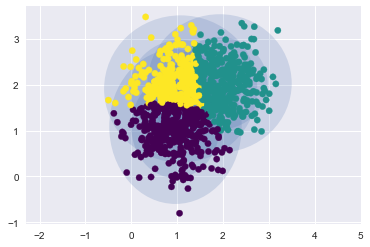

In [117]:
#Clustering Visualization in EM
gmm = GMM(n_components=3, random_state=42)
plot_gmm(gmm, XTfidf)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

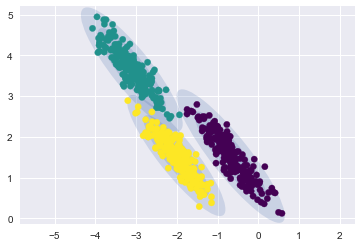

In [113]:
gmm = GMM(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

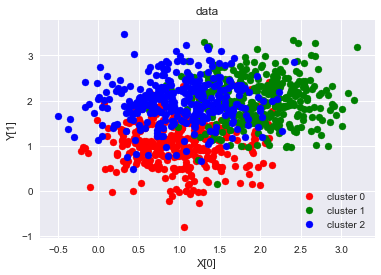

ARI:0.18657581037442772
Sum center distance 150.0787654199928


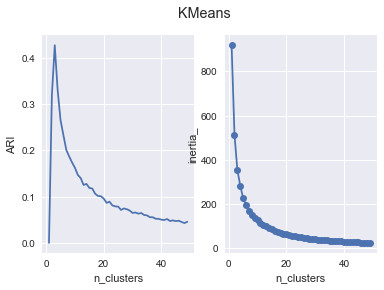

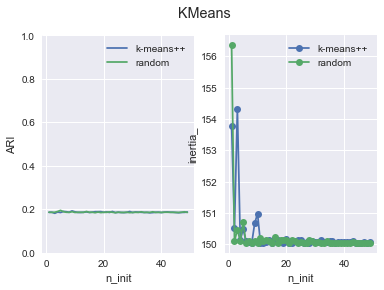

In [114]:
from sklearn import  cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import adjusted_rand_score

def create_data(centers,num=100,std=0.7):
    '''
    generate data
    :param centers: dimension of centre
    :param num: number of sample
    :param std: std of each cluster
    :return: data, target
    '''
    XTfidf, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  XTfidf,labels_true
def plot_data(*data):
    '''
    graph the dataset
    :param data: data, target
    :return: None
    '''
    XTfidf,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm'
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(XTfidf[position,0],XTfidf[position,1],label="cluster {0}".format(label),
		color=colors[i%len(colors)])

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()



def test_Kmeans(*data):
    '''
    test the Kmeans
    :param data: data, target
    :return: None
    '''
    XTfidf,labels_true=data
    clst=cluster.KMeans()
    clst.fit(XTfidf)
    predicted_labels=clst.predict(XTfidf)
    print("ARI:{0}".format( adjusted_rand_score(labels_true,predicted_labels)))
    print("Sum center distance {0}".format(clst.inertia_))
    
def test_Kmeans_nclusters(*data):
    '''
    test the performance with different n_clusters
    :param data: data, target
    :return: None
    '''
    XTfidf,labels_true=data
    nums=range(1,50)
    ARIs=[]
    Distances=[]
    for num in nums:
        clst=cluster.KMeans(n_clusters=num)
        clst.fit(XTfidf)
        predicted_labels=clst.predict(XTfidf)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances.append(clst.inertia_)

    ## graph
    fig=plt.figure()
    ax=fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs,marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums,Distances,marker='o')
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("inertia_")
    fig.suptitle("KMeans")
    plt.show()
def test_Kmeans_n_init(*data):
    '''
    test the performance with different n_init and init paramter
    :param data: data, target
    :return: None
    '''
    XTfidf,labels_true=data
    nums=range(1,50)
    ## graph
    fig=plt.figure()

    ARIs_k=[]
    Distances_k=[]
    ARIs_r=[]
    Distances_r=[]
    for num in nums:
            clst=cluster.KMeans(n_init=num,init='k-means++')
            clst.fit(XTfidf)
            predicted_labels=clst.predict(XTfidf)
            ARIs_k.append(adjusted_rand_score(labels_true,predicted_labels))
            Distances_k.append(clst.inertia_)

            clst=cluster.KMeans(n_init=num,init='random')
            clst.fit(XTfidf)
            predicted_labels=clst.predict(XTfidf)
            ARIs_r.append(adjusted_rand_score(labels_true,predicted_labels))
            Distances_r.append(clst.inertia_)

    ax=fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs_k,marker="+",label="k-means++")
    ax.plot(nums,ARIs_r,marker="+",label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("ARI")
    ax.set_ylim(0,1)
    ax.legend(loc='best')
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums,Distances_k,marker='o',label="k-means++")
    ax.plot(nums,Distances_r,marker='o',label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("inertia_")
    ax.legend(loc='best')

    fig.suptitle("KMeans")
    plt.show()

if __name__=='__main__':
    centers=[[1,1],[2,2],[1,2]]
    XTfidf,labels_true=create_data(centers,1000,0.5)
    plot_data(XTfidf,labels_true)
    test_Kmeans(XTfidf,labels_true)
    test_Kmeans_nclusters(XTfidf,labels_true)
    test_Kmeans_n_init(XTfidf,labels_true)

In [83]:
#Kappa Calculation
from sklearn.metrics import cohen_kappa_score
y_true = MergedFrame['author']
KappaScoreKMeans = cohen_kappa_score(y_true, cluster_labels_KMeans)
KappaScoreKMeans_BOW = cohen_kappa_score(y_true, cluster_labels_KMeans_BOW)
KappaScoreEM = cohen_kappa_score(y_true, cluster_labels_EM)
KappaScoreHC = cohen_kappa_score(y_true, cluster_HC_Tfidf)
KappaScoreHC_BOW = cohen_kappa_score(y_true, cluster_HC_BOW)
KappaScoreKMeans_EM = cohen_kappa_score(cluster_labels_KMeans, cluster_labels_EM)
KappaScoreKMeans_HC = cohen_kappa_score(cluster_labels_KMeans, cluster_HC_Tfidf)
KappaScoreHC_EM = cohen_kappa_score(cluster_HC_Tfidf, cluster_labels_EM)
 # silhouette_scoreThe silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
#Silhouette Calculation
silhouette_avg_KMeans = silhouette_score(XTfidf, cluster_labels_KMeans)
silhouette_avg_EM = silhouette_score(XTfidf, cluster_labels_EM)
silhouette_avg_HC = silhouette_score(XTfidf, cluster_HC_Tfidf)
silhouette_avg_KMeans_BOW = silhouette_score(XTfidf, cluster_labels_KMeans_BOW)
#silhouette_avg_EM_BOW = silhouette_score(XTfidf, cluster_labels_EM)
silhouette_avg_HC_BOW = silhouette_score(XTfidf, cluster_HC_BOW)
print(KappaScoreKMeans)
print(KappaScoreKMeans_BOW)
print(KappaScoreEM)
print(KappaScoreHC)
print(KappaScoreHC_BOW)
print(KappaScoreKMeans_EM)
print(KappaScoreKMeans_HC)
print(KappaScoreHC_EM)
print(silhouette_avg_KMeans)
print(silhouette_avg_EM)
print(silhouette_avg_HC)
print(silhouette_avg_HC_BOW)
print(silhouette_avg_KMeans_BOW)


#0.2825
#0.7925
#0.06727660649459524
#0.06796583532831972

0.645
-0.01750000000000007
0.8975
0.025000000000000022
0.025000000000000022
0.6344246072313593
0.03500000000000003
0.01000000000000012
0.06718049814990226
0.06635279307109535
-0.0028368973087939966
-0.0028368973087939966
0.05889517474174459


In [118]:
#Error Analysis
NewColumn = pd.DataFrame(cluster_labels_EM)
NewColumn.columns = ['Prediction']

NewFrame =[MergedFrame['Sample'],MergedFrame['author'],NewColumn['Prediction']]
NewFrame = pd.DataFrame(NewFrame)

NewFrame = NewFrame.T
NewFrame

,Sample,author,Prediction
0,parent assistant maria edgeworth orphans near ...,0,0
1,good children finished eating suppers came rou...,0,0
2,resolved exert utmost first care pay debts mot...,0,0
3,charity sake neighbours poor enough bethought ...,0,0
4,debt schoolmistress would receive goat said co...,0,0
5,round side church saw mary kneeling beside gra...,0,0
6,could teach knit supply flax isabella sent nex...,0,0
7,largest longest best decayed labourers women c...,0,2
8,could made always believed said answer bid wai...,0,0
9,wear shoes stockings hurt feet besides waited ...,0,0


In [149]:
print("Top terms per cluster:")
order_centroids = clusterer.cluster_centers_.argsort()[:, ::-1]
terms = matrixTfidf.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i)
    for ind in order_centroids[i,: 50]:
        print(ind)        
terms

Top terms per cluster:
Cluster 0:
8341
8270
8215
3234
8337
9969
2997
6739
2103
8271
4165
4094
2625
3810
1630
4704
9188
7206
2500
3254
3302
2519
8250
3194
9874
4245
3063
3180
158
3009
4592
7554
3967
2606
3938
7573
8342
8365
9628
3980
4325
2470
9812
5044
7269
350
3944
2336
4131
7211
Cluster 1:
6313
7905
9890
4020
3009
9158
1460
4704
4431
3810
6975
3721
9628
969
1253
2993
6578
4454
4481
2519
1630
4372
8372
6739
4551
810
8032
9632
3063
1518
6403
4152
3944
6409
522
3106
432
7868
4063
2949
4456
8117
3385
5133
4209
4165
3221
9863
351
1016
Cluster 2:
6578
4704
3234
2103
9969
1630
4165
6739
4094
4565
4057
3063
4289
4693
9188
3967
3810
2500
3980
4245
3302
2997
8337
9628
9158
8372
8271
6536
2338
2625
3972
3009
3140
1253
9890
4187
2336
1460
158
7241
4553
4551
9874
4456
8250
3847
5044
761
4481
7813


['air',
 'arms',
 'away',
 'best',
 'better',
 'bring',
 'came',
 'children',
 'come',
 'cried',
 'day',
 'deep',
 'divine',
 'door',
 'earth',
 'end',
 'eyes',
 'face',
 'fair',
 'far',
 'father',
 'forth',
 'god',
 'good',
 'great',
 'half',
 'hand',
 'hands',
 'happy',
 'head',
 'hear',
 'heard',
 'heaven',
 'hell',
 'high',
 'home',
 'hope',
 'house',
 'joy',
 'knew',
 'know',
 'land',
 'large',
 'leave',
 'left',
 'let',
 'life',
 'light',
 'like',
 'little',
 'long',
 'look',
 'love',
 'make',
 'man',
 'men',
 'mind',
 'morning',
 'mother',
 'mr',
 'nature',
 'new',
 'night',
 'old',
 'open',
 'pass',
 'place',
 'power',
 'present',
 'rest',
 'right',
 'round',
 'said',
 'saw',
 'say',
 'sea',
 'set',
 'shall',
 'son',
 'soon',
 'soul',
 'stand',
 'stood',
 'sun',
 'sure',
 'susan',
 'sweet',
 'tell',
 'thee',
 'thing',
 'things',
 'think',
 'thou',
 'thought',
 'thy',
 'till',
 'time',
 'voice',
 'way',
 'went',
 'woman',
 'words',
 'work',
 'world',
 'young']

In [87]:
NewFrame['Sample'][7]

'largest longest best decayed labourers women children make business procure prepare soon cut must flung water kept otherwise dry shrink peel run junci thus far prepared must lie grass bleached take dew nights afterwards dried sun address required dipping rushes scalding fat grease knack also attained practice pound common grease may procured fourpence six pounds grease dip pound rushes one pound rushes may bought one shilling pound rushes medicated ready use cost three shillings servant pleased good nature trifling instance remembered long forgotten edmund whenever master wanted send messenger anywhere gilbert servant name always employed little friend edmund upon acquaintance liked better better found edmund quick exact executing commissions one day waited great gentleman house answer letter impatient get home ran without questioned gilbert bring answer attempt make excuse say answer please honour bid wait etc told exactly truth though gilbert scolded impatient wait yet telling truth

In [88]:
#largest:  2; longest:  2;  children : 0; woman: cluster 2

In [89]:
#Plot Confusion Matrix Function
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix_kMeans = confusion_matrix(y_true,cluster_labels_KMeans )
confusion_matrix_EM = confusion_matrix(y_true,cluster_labels_EM )
class_names=[0,1,2]

Confusion matrix, without normalization
[[186   0  14]
 [  0  83 117]
 [  0  11 189]]


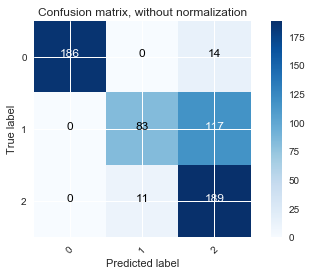

In [91]:
plot_confusion_matrix(confusion_matrix_kMeans, classes=class_names,
                      title='Confusion matrix, without normalization')


Confusion matrix, without normalization
[[197   0   3]
 [  0 195   5]
 [ 15  18 167]]


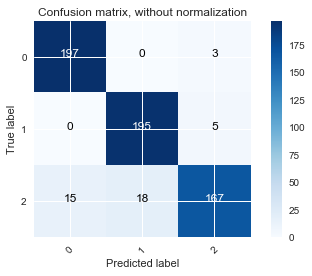

In [92]:
plot_confusion_matrix(confusion_matrix_EM, classes=class_names,
                      title='Confusion matrix, without normalization')


In [93]:
from sklearn import metrics
my_tags = ['Edgeworth','Milton','Whitman']
print(metrics.classification_report(y_true, cluster_labels_EM,target_names=my_tags))

             precision    recall  f1-score   support

  Edgeworth       0.93      0.98      0.96       200
     Milton       0.92      0.97      0.94       200
    Whitman       0.95      0.83      0.89       200

avg / total       0.93      0.93      0.93       600



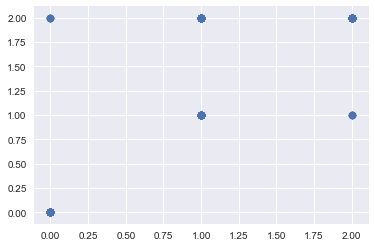

In [96]:
plt.scatter(y_true, cluster_labels_KMeans)

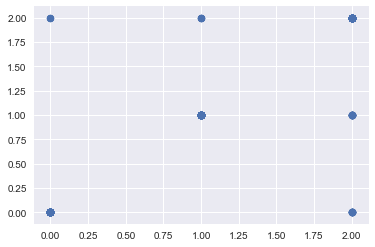

In [97]:
plt.scatter(y_true, cluster_labels_EM)